# Data Analysis and Mining - Linear Regression

## Objectives

- Perform simple linear regression
- Use correlation analysis to determine whether two quantities are related to justify fitting the data.
- Fit a linear model to the data.
- Evaluate the goodness of fit by plotting residuals and looking for patterns.
- Calculate measures of goodness of fit R2 and adjusted R2

## Initialization

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from numpy.linalg import inv
from numpy import dot
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import t

%matplotlib inline
sns.set_style("darkgrid")

### Load data

Start by loading the entire dataset.

In [3]:
# Specify the path to the dataset CSV file
dataset_path = "../../Dataset/dataset.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

df.head()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


### Data cleaning

First, we drop columns that we do not need. In addition, we add one more column which represents the percentage of win games, as it is one of the most interesting features.

In [4]:
# Drop columns 'TEAM', 'CONF', 'POSTSEASON'
df = df.drop(['TEAM', 'CONF', 'POSTSEASON'], axis=1)

# Add column percentage of wins as W/G
df['W/G'] = df['W'] / df['G'] * 100

Check the size of the dataset.

In [5]:
df.shape

(1757, 22)

We decided to analyze a subset of the whole dataset. Since our dataset is a collection of data which belongs to 5 different seasons, we filter the dataset by only keeping and analyzing the information related to one year.

In [6]:
# Filter by year, keep only data from selected year
df = df[df['YEAR'] == 2015]

## Analysis

### Correlation Analysis Y(ADJOE)

Check the correlation between different pairs of columns to see which variables are potentially related. We will take ADJOE, ADJDE and BARTHAG as they are known for being quite correlated to the percentage of win games.

In [7]:
# Get slice
X_ADJOE = df[['ADJOE']].values
# Reshape
X_ADJOE = X_ADJOE.reshape(-1, 1)

# Get slice with W/G
Y = df['W/G'].values.reshape(-1, 1)

In order to approximate $$Y = \beta X + \epsilon$$ we will use Least Squares

$$\hat{\beta} = (X^TX)^{-1}X^TY$$  

Let us start without introducing the intercept term.

In [8]:
# Find beta for ADJOE
beta = dot(dot(inv(dot(X_ADJOE.T, X_ADJOE)), X_ADJOE.T), Y) 
print('Estimated coefficient for ADJOE:', beta[0])

Estimated coefficient for ADJOE: [0.48653126]


Let us now introduce the intercept term.

Estimated coefficients for ADJOE: [1.90760887] [-146.1568167]


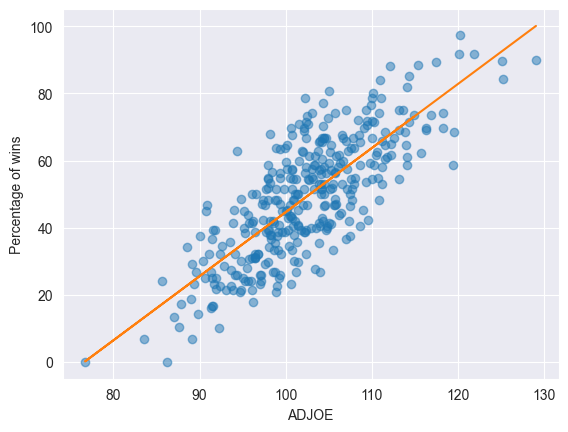

In [9]:
# Add constant term as a column
X_ADJOE = np.c_[X_ADJOE, np.ones(len(X_ADJOE))]

# Find beta for ADJOE
beta = dot(dot(inv(dot(X_ADJOE.T, X_ADJOE)), X_ADJOE.T), Y) 
beta = np.reshape(beta, (-1,1))
print('Estimated coefficients for ADJOE:', beta[0], beta[1])

# Matrix multiplication between X_ADJOE and beta_ADJOE
predictions = dot(X_ADJOE, beta)

ax = sns.regplot(x=X_ADJOE[:,0], y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ADJOE', ylabel='Percentage of wins')
plt.plot(X_ADJOE[:,0], predictions)

plt.show()

### Residuals and Goodness of Fit Y(ADJOE)

One measure of goodness of fit is the Coefficient of Determination, or $R^2$ (pronounced r-square)  

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

Where:
- $ SS_{res} $ is the sum of squares of residuals (SSE), which represents the total variation in the dependent variable that is not explained by the independent variables.
- $ SS_{tot} $ is the total sum of squares (TSS), which represents the total variation in the dependent variable.


In [10]:
# Compute for ADJOE
sstotal = np.sum((Y - np.mean(Y))**2)
ssres = np.sum((Y - predictions)**2)
rsq = 1 - (ssres / sstotal)

print('Coefficient of Determinacy, model for ADJOE:', np.round(rsq, 2))

Coefficient of Determinacy, model for ADJOE: 0.61


Another important metric is the Coefficient of Correlation.
This coefficient measures the strength and direction of the linear relationship between two variables.
The provided code calculates the correlation coefficient for the ADJOE model.


In [11]:
# Find correlation coefficient
correlation = np.corrcoef(X_ADJOE[:,0], Y[:,0])[0,1]
print('Coefficient of Correlation, model for ADJOE:', np.round(correlation, 2))

Coefficient of Correlation, model for ADJOE: 0.78


### Check assumptions Y(ADJOE)

Obtain a normal probability plot of the standardized residuals from this regression.

(0.0, 100.0)

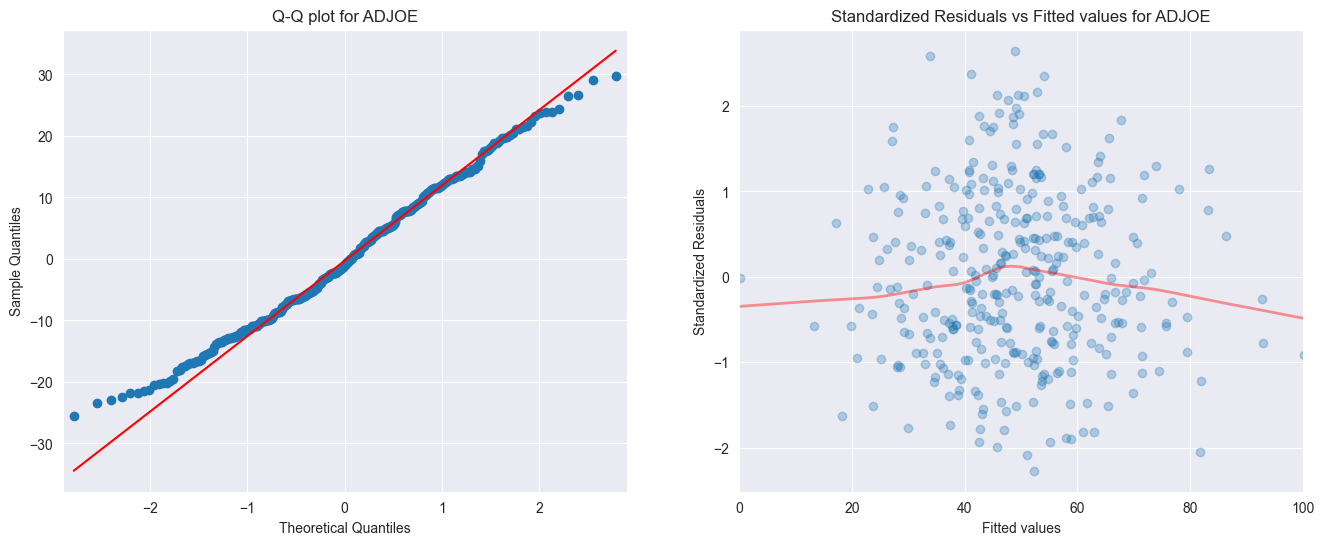

In [12]:
# Prepare subplots
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

# Compute degrees_of_freedom
degrees_of_freedom = len(Y) - X_ADJOE.shape[1]

# --------- ADJOE ---------

# And plot Q-Q for ADJOE
sm.qqplot((Y - predictions)[:,0], stats.t, distargs=(degrees_of_freedom,), line='q', ax=axs[0])
axs[0].set_title(label = 'Q-Q plot for ADJOE')

# Then compute what is necessary for the residuals plot for ADJOE
residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum( ((Y - predictions)[:,0])**2) )
leverage = ( (1/len(X_ADJOE)) + ( ( (X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2 ) / np.sum( (X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2) ) )
standardized_residuals = (Y - predictions)[:,0] / (residuals_standard_error * np.sqrt( 1 - leverage))

# And plot it for ADJOE
sns.regplot(x = predictions[:,0], y=standardized_residuals, ax=axs[1], lowess=True, scatter_kws={'alpha':0.3}, line_kws={"color":"r","alpha":0.4,"lw":2})
axs[1].set_title(label = 'Standardized Residuals vs Fitted values for ADJOE')
axs[1].set(ylabel='Standardized Residuals', xlabel='Fitted values')
axs[1].set_xlim(0,100)

Assumptions:

1. Zero Mean Assumption  
    $E(\epsilon |X) = 0$, in the second figure we can check that the mean of residuals along the domain falls relatively on a straight line, as shown by over positioning of the lowess curve (applied to the data) and the horizontal line at zero.  
2. Constant Variance Assumption  
    Checking the second figure, the constant variance assumption in our model is satisfied as well.
3. Independence Assumption  
    In the second figure, the points are more or less symmetrically distributed around the horizontal line, meaning the model does not systematically underpredicts or overpredicts when the independent variable has a particular configuration.  
4. Normality Assumption  
    The first plot shows us that there is a slight S shape, more pronounced at higher values. 

Let us print more statistics:

In [13]:
# Construct a Pandas Dataframe
df_stats = pd.DataFrame({'WIN_RATIO':Y.flatten(), 'ADJOE':X_ADJOE[:,0]})

# Fit a model according to the formula, target ~ dependent_variables
lr_fit = ols('WIN_RATIO ~ ADJOE', data=df_stats).fit()

# model summary
print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              WIN_RATIO   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     549.2
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.25e-73
Time:                        12:17:55   Log-Likelihood:                -1347.3
No. Observations:                 351   AIC:                             2699.
Df Residuals:                     349   BIC:                             2706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -146.1568      8.350    -17.503      0.0

## Feature engineering

Do regression analysis with a Log transformation on the target class.

Estimated coefficients for log(ADJOE): [195.66215499] [-855.98030447]
Estimated coefficients for log(Y_LOG): [0.04373737] [-0.66069294]


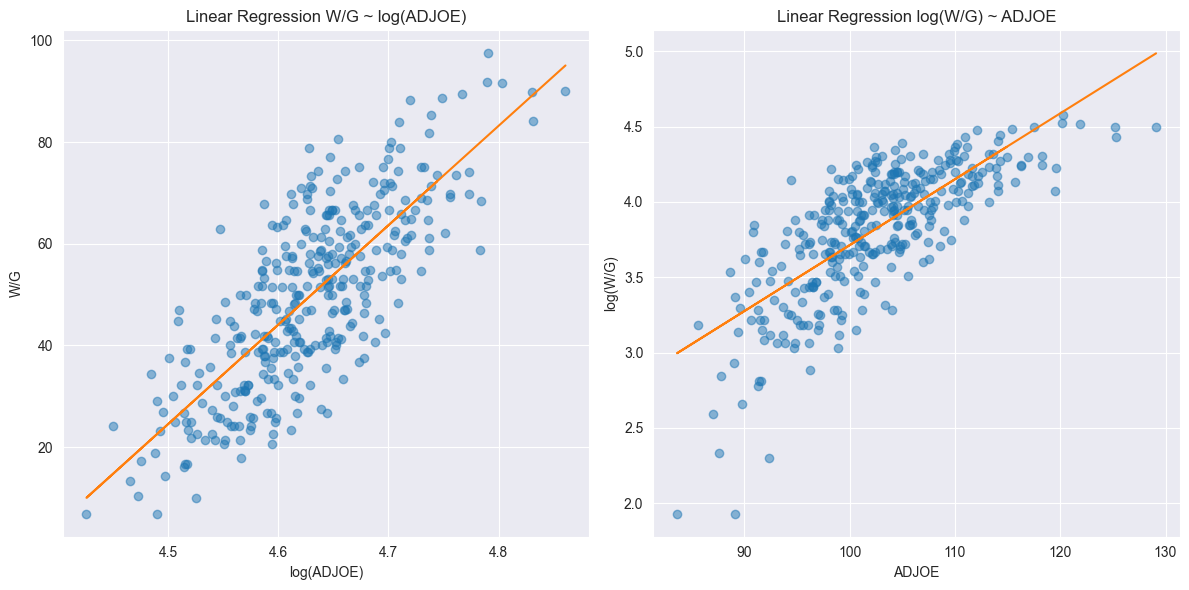

In [14]:
# Eliminate zero values from df
df2 = df[df['W/G'] != 0]

# Get dataset with ADJOE and column of ones without those rows
X_ADJOE = np.c_[df2[['ADJOE']].values, np.ones(len(df2[['ADJOE']].values))] # this command 
# Make log transformation to ADJOE
df2.loc[:, 'ADJOE'] = np.log(df2['ADJOE'])
# Get ADJOE_LOG and column of ones
X_ADJOE_LOG = np.c_[df2[['ADJOE']].values, np.ones(len(df2[['ADJOE']].values))] # this command 

# Get W/G
Y_f = df2['W/G'].values.reshape(-1, 1).copy()
# Make log transformation to W/G
df2.loc[:, 'W/G'] = np.log(df2['W/G'])
# Get Y_LOG
Y_LOG = df2['W/G'].values.reshape(-1, 1).copy()

# Perform linear regression with ADJOE_LOG
beta_ADJOE_LOG = np.linalg.lstsq(X_ADJOE_LOG, Y_f, rcond=None)[0]
print('Estimated coefficients for log(ADJOE):', beta_ADJOE_LOG[0], beta_ADJOE_LOG[1])
predictions_ADJOE_LOG = dot(X_ADJOE_LOG, beta_ADJOE_LOG) 

# Perform linear regression with Y_LOG
beta_Y_LOG = np.linalg.lstsq(X_ADJOE, Y_LOG, rcond=None)[0]
print('Estimated coefficients for log(Y_LOG):', beta_Y_LOG[0], beta_Y_LOG[1])
predictions_Y_LOG = dot(X_ADJOE, beta_Y_LOG)

# And plot it
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax1 = sns.regplot(x=X_ADJOE_LOG[:,0], y=Y_f, fit_reg=False, scatter_kws={'alpha':0.5}, ax=axes[0])
ax1.set(xlabel='log(ADJOE)', ylabel='W/G', title='Linear Regression W/G ~ log(ADJOE)')
ax1.plot(X_ADJOE_LOG[:,0], predictions_ADJOE_LOG)

ax2 = sns.regplot(x=X_ADJOE[:,0], y=Y_LOG, fit_reg=False, scatter_kws={'alpha':0.5}, ax=axes[1])
ax2.set(xlabel='ADJOE', ylabel='log(W/G)', title='Linear Regression log(W/G) ~ ADJOE')
ax2.plot(X_ADJOE[:,0], predictions_Y_LOG)

plt.tight_layout()
plt.show()

Get the same coefficients as it was done before.

In [15]:
# Compute R-square for ADJOE_LOG
sstotal_ADJOE_LOG = np.sum((Y_f - np.mean(Y_f))**2)
ssres_ADJOE_LOG = np.sum((Y_f - predictions_ADJOE_LOG)**2)
rsq_ADJOE_LOG = 1 - (ssres_ADJOE_LOG / sstotal_ADJOE_LOG)
print('Coefficient of Determinacy for log(ADJOE):', np.round(rsq_ADJOE_LOG, 2))

# Compute R-square for Y_LOG
sstotal_Y_LOG = np.sum((Y_LOG - np.mean(Y_LOG))**2)
ssres_Y_LOG = np.sum((Y_LOG - predictions_Y_LOG)**2)
rsq_Y_LOG = 1 - (ssres_Y_LOG / sstotal_Y_LOG)
print('Coefficient of Determinacy for log(Y):', np.round(rsq_Y_LOG, 2))

# Compute correlation coefficient for ADJOE_LOG
correlation_ADJOE_LOG = np.corrcoef(X_ADJOE_LOG[:,0], Y_f[:,0])[0,1]
print('Coefficient of Correlation for log(ADJOE):', np.round(correlation_ADJOE_LOG, 2))

# Compute correlation coefficient for Y_LOG
correlation_Y_LOG = np.corrcoef(X_ADJOE[:,0], Y_LOG[:,0])[0,1]
print('Coefficient of Correlation for log(Y):', np.round(correlation_Y_LOG, 2))

Coefficient of Determinacy for log(ADJOE): 0.6
Coefficient of Determinacy for log(Y): 0.55
Coefficient of Correlation for log(ADJOE): 0.78
Coefficient of Correlation for log(Y): 0.74


Obtain a normal probability plot of the standardized residuals from this regression.

[Text(0, 0.5, 'Standardized Residuals'), Text(0.5, 0, 'Fitted values')]

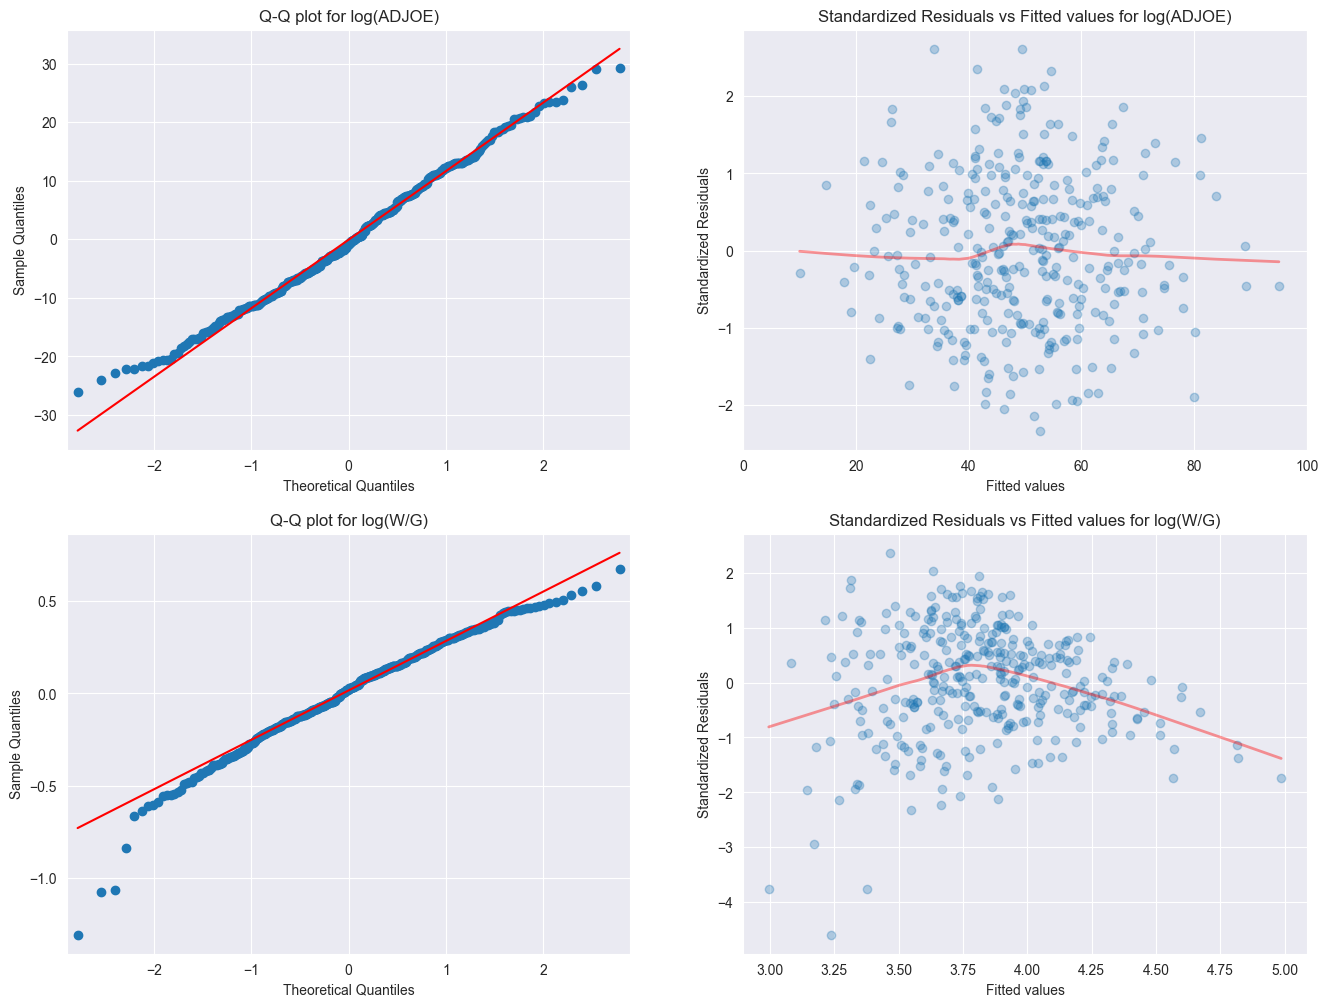

In [16]:
# Prepare subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))

# Compute degrees_of_freedom
degrees_of_freedom = len(Y_f) - X_ADJOE_LOG.shape[1]

# --------- log(ADJOE) ---------

# And plot Q-Q for log(ADJOE)
sm.qqplot((Y_f - predictions_ADJOE_LOG)[:,0], stats.t, distargs=(degrees_of_freedom,), line='q', ax=axs[0][0])
axs[0][0].set_title(label = 'Q-Q plot for log(ADJOE)')

# Then compute what is necessary for the residuals plot for log(ADJOE)
residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum( ((Y_f - predictions_ADJOE_LOG)[:,0])**2) )
leverage = ( (1/len(X_ADJOE_LOG)) + ( ( (X_ADJOE_LOG[:,0] - np.mean(X_ADJOE_LOG[:,0]))**2 ) / np.sum( (X_ADJOE_LOG[:,0] - np.mean(X_ADJOE_LOG[:,0]))**2) ) )
standardized_residuals = (Y_f - predictions_ADJOE_LOG)[:,0] / (residuals_standard_error * np.sqrt(1 - leverage))

# And plot it
sns.regplot(x = predictions_ADJOE_LOG[:,0], y=standardized_residuals, ax=axs[0][1], lowess=True, scatter_kws={'alpha':0.3}, line_kws={"color":"r","alpha":0.4,"lw":2})
axs[0][1].set_title(label = 'Standardized Residuals vs Fitted values for log(ADJOE)')
axs[0][1].set(ylabel='Standardized Residuals', xlabel='Fitted values')
axs[0][1].set_xlim(0,100)

# --------- log(W/G) ---------

# And plot Q-Q for log(W/G)
sm.qqplot((Y_LOG - predictions_Y_LOG)[:,0], stats.t, distargs=(degrees_of_freedom,), line='q', ax=axs[1][0])
axs[1][0].set_title(label = 'Q-Q plot for log(W/G)')

# Then compute what is necessary for the residuals plot for log(W/G)
residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum( ((Y_LOG - predictions_Y_LOG)[:,0])**2) )
leverage = ( (1/len(X_ADJOE)) + ( ( (X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2 ) / np.sum( (X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2) ) )
standardized_residuals = (Y_LOG - predictions_Y_LOG)[:,0] / (residuals_standard_error * np.sqrt(1 - leverage))

# And plot it
sns.regplot(x = predictions_Y_LOG[:,0], y=standardized_residuals, ax=axs[1][1], lowess=True, scatter_kws={'alpha':0.3}, line_kws={"color":"r","alpha":0.4,"lw":2})
axs[1][1].set_title(label = 'Standardized Residuals vs Fitted values for log(W/G)')
axs[1][1].set(ylabel='Standardized Residuals', xlabel='Fitted values')


Assumptions:

1. Zero Mean Assumption  
    $E(\epsilon |X) = 0$, in the second figure we can check that the mean of residuals along the domain falls relatively on a straight line, as shown by over positioning of the lowess curve (applied to the data) and the horizontal line at zero.  
2. Constant Variance Assumption  
    Checking the second figure, the constant variance assumption in our model is satisfied as well.
3. Independence Assumption  
    In the second figure, the points are more or less symmetrically distributed around the horizontal line, meaning the model does not systematically underpredicts or overpredicts when the independent variable has a particular configuration.  
4. Normality Assumption  
    The first plot shows us that there is a slight S shape, more pronounced at higher values. 

## Testing

### Statistical Hypothesis

Testing that linear relation exists.

In [17]:
# T-Test that linear relation exists with H0: beta = 0

# Compute degrees_of_freedom
degrees_of_freedom = len(X_ADJOE) - 2

# Compute the standard error of the regression coefficient (beta)
SE_beta = np.sqrt( (ssres/degrees_of_freedom) / np.sum((X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2) )

# Compute the t-value
t_value = beta[0] / SE_beta

# Compute the p-value
p_value = stats.t.sf(np.abs(t_value), degrees_of_freedom) * 2

print('T-Test for ADJOE')
print('t-value:', t_value)
print('p-value:', p_value)


T-Test for ADJOE
t-value: [22.79954818]
p-value: [5.73088688e-71]


Confidence interval for the slope coefficient.

In [18]:
# Compute the standard error of the regression coefficient (beta)
SE_beta = np.sqrt( (ssres/degrees_of_freedom) / np.sum((X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2) )

# Compute the t-value for the confidence interval (assuming 95% confidence)
t_value = stats.t.ppf(0.975, degrees_of_freedom)

# Compute the margin of error
margin_of_error = t_value * SE_beta

# Compute the lower and upper bounds of the confidence interval for beta
lower_bound_beta = beta[0] - margin_of_error
upper_bound_beta = beta[0] + margin_of_error

print("95% Confidence Interval for beta:")
print("Lower Bound:", lower_bound_beta)
print("Upper Bound:", upper_bound_beta)

95% Confidence Interval for beta:
Lower Bound: [1.74304724]
Upper Bound: [2.07217051]


Confidence interval for the correlation coefficient.

In [19]:
# Compute Fisher's z transformation of r (square root of rsq)
z = np.arctanh(np.sqrt(rsq))

# Compute the standard error of Fisher's z transformation
SE_z = 1 / np.sqrt(len(X_ADJOE[:,0]) - 3)

# Compute the margin of error
margin_of_error = t_value * SE_z

# Compute the lower and upper bounds of the confidence interval for Fisher's z
lower_bound_z = z - margin_of_error
upper_bound_z = z + margin_of_error

# Transform the bounds back to the correlation scale
lower_bound_rho = np.tanh(lower_bound_z)
upper_bound_rho = np.tanh(upper_bound_z)

print("95% Confidence Interval for the Correlation Coefficient (rho):")
print("Lower Bound:", lower_bound_rho)
print("Upper Bound:", upper_bound_rho)

95% Confidence Interval for the Correlation Coefficient (rho):
Lower Bound: 0.7373399477037269
Upper Bound: 0.8197645400854673


Confidence interval for the prediction of W/G given a fixed value of ADJOE.


In [20]:
# Take ADJOE = 120 and compute confidence interval for W/G
ADJOE_value = 100
WG_pred = beta[0] * ADJOE_value + beta[1]

# Compute the standard error of the prediction
SE_pred = np.sqrt( (ssres/degrees_of_freedom) * (1/len(X_ADJOE[:,0]) + (ADJOE_value - np.mean(X_ADJOE[:,0]))**2 / np.sum((X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2)) )

# Compute the margin of error for 95% confidence interval
margin_of_error = t_value * SE_pred

# Compute the lower and upper bounds of the confidence interval
lower_bound_WG = WG_pred - margin_of_error
upper_bound_WG = WG_pred + margin_of_error

# Print the results
print("95% Confidence Interval for W/G given ADJOE = 120:")
print("Lower Bound:", lower_bound_WG)
print("Upper Bound:", upper_bound_WG)
print()


95% Confidence Interval for W/G given ADJOE = 120:
Lower Bound: [43.34832694]
Upper Bound: [45.85981444]



Prediction interval for W/G given a fixed value of ADJOE.

In [21]:
# Take ADJOE = 120 and compute confidence interval for W/G
ADJOE_value = 100
WG_pred = beta[0] * ADJOE_value + beta[1]

# Compute the standard error of the prediction
SE_pred = np.sqrt( (ssres/degrees_of_freedom) * (1 + 1/len(X_ADJOE[:,0]) + (ADJOE_value - np.mean(X_ADJOE[:,0]))**2 / np.sum((X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2)) )

# Compute the margin of error for 95% confidence interval
margin_of_error = t_value * SE_pred

# Compute the lower and upper bounds of the confidence interval
lower_bound_WG = WG_pred - margin_of_error
upper_bound_WG = WG_pred + margin_of_error

# Print the results
print("95% Confidence Interval for W/G given ADJOE = 120:")
print("Lower Bound:", lower_bound_WG)
print("Upper Bound:", upper_bound_WG)
print()


95% Confidence Interval for W/G given ADJOE = 120:
Lower Bound: [22.33578431]
Upper Bound: [66.87235707]

